In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding



print('Loading data...')
dataset = pd.read_csv('pgp_substrate_descriptor_1less.csv', sep=',')
X, y = dataset.iloc[:,1:-1], dataset.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=524)
print(X_train.shape)
X_train = X_train.values.reshape(X_train.shape[0],  X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0],  X_train.shape[1])

print(X_train.shape, X_test.shape)
print('data loaded')



Loading data...
(264, 1443)
(264, 1443) (67, 1443)
data loaded


In [18]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


batch_size = 128
num_classes = 2
epochs = 10

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               739328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 739,841.0
Trainable params: 739,841.0
Non-trainable params: 0.0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=epochs,
                    verbose=128,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 264 samples, validate on 67 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Test loss: 0.64261484502
Test accuracy: 0.76119403074


32/67 [=============>................] - ETA: 0s[[ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55371374]
 [ 0.55

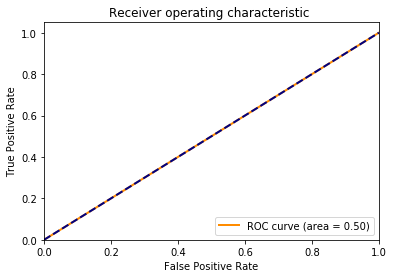

In [24]:
y_score=model.predict_proba(X_test)
print(y_score)
score = model.evaluate(X_test,y_test, verbose=0)
print(score)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



y_score_get_value=[]
for item in y_score:
    y_score_get_value.append(item[0])
    
fpr, tpr, _ = roc_curve(y_test, y_score_get_value)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()
